### **Data Project: Data Analysis of COVID-19 Related Cases in Selected Countries**

Imports and set magics

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import itertools
import operator
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Read and clean data**

**Reading the relevant data** from European Center for Disease Control. The data includes COVID-19 Cases and Deaths for all countries.

Renaming colums and keeping data only for the 5 selected countries. Furthermore, the spread of COVID-19 in Europe and the US did not significantly take place before early March 2020 - as such we only focus on data from March and April 2020.

When considering the number of cases in the data, it is important to note, that different countries employ different strategies with respect to testing. As such, if a country tests rigorously it is bound to record more cases related to COVID-19. Therefore, we also consider the number of deaths related to COVID-19. Deaths related to COVID-19 can be considered as a constant rate of the *true* number of infected. Furthermore, it will not be conditioned on the number of tests being performed by each country.

In [29]:
# a. load
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-04-06.xlsx'
df = pd.read_excel(url)

#In case of the URL not working, the dataframe can be loaded from the excel file provided:
#df = pd.read_excel('Covid_Data.xlsx')

# b. rename columns
df.rename(columns = {'countryterritoryCode':'country', 'dateRep':'date'}, inplace=True)

#c. keeping the 5 relevant countries to be analyzed
array = ['ITA', 'ESP', 'DNK', 'SWE', 'USA']
df = df.loc[df['country'].isin(array)]

#d. keeping the months of interest (March & April)
array2 = [3, 4]
df = df.loc[df['month'].isin(array2)]

The data is restructured to yield a seperate column for cases and deaths in each country. We are interested in the growth in the number of COVID-19 related cases and deaths. Since the data is specified as recorded daily cases and deaths we calculate the total number of cases and deaths for a given day by accumulating the data. This is stored in a new dataframe - covid_accu.

In [31]:
covid = pd.DataFrame()
#e. reformatting data
for country, group in df.groupby("country"):
    if covid.empty:
        covid = group.set_index("date")[["cases", "deaths"]].rename(columns={"cases":country + " cases", "deaths":country + " deaths"})
    else:
        covid = covid.join(group.set_index("date")[["cases", "deaths"]].rename(columns={"cases":country + " cases", "deaths":country + " deaths"}))

#f. accumulative data
covid_accu = covid.sort_values(by='date').cumsum()
covid_accu.head()

,DNK cases,DNK deaths,ESP cases,ESP deaths,ITA cases,ITA deaths,SWE cases,SWE deaths,USA cases,USA deaths
date,,,,,,,,,,
2020-03-01,1,0,32,0,240,8,1,0,3,1
2020-03-02,2,0,49,0,801,14,2,0,23,2
2020-03-03,3,0,80,0,947,31,3,0,37,6
2020-03-04,6,0,117,0,1614,59,12,0,59,9
2020-03-05,8,0,166,1,2201,86,23,0,93,11


**Descriptives** on daily cases and deaths showing average number of new daily cases and deaths as well as the highest recorded number of daily cases and deaths.

In [32]:
covid.agg(['max', 'mean']).round(1)

,DNK cases,DNK deaths,ESP cases,ESP deaths,ITA cases,ITA deaths,SWE cases,SWE deaths,USA cases,USA deaths
max,371.0,22.0,9222.0,950.0,6557.0,971.0,612.0,59.0,34272.0,1344.0
mean,118.0,4.8,3533.1,335.6,3461.1,428.9,184.3,10.8,9123.5,260.7


**Descriptives** on the cumulated data showing total number of cases and deaths (Updated 6th April 2020).

In [33]:
covid_accu.agg(['max']).round(1)

,DNK cases,DNK deaths,ESP cases,ESP deaths,ITA cases,ITA deaths,SWE cases,SWE deaths,USA cases,USA deaths
max,4367,179,130725,12418,128060,15868,6818,401,337569,9647


We note, the numbers for the United States eclipse those of the 4 other countries in our dataset. Both with respect to daily numbers and the total figure, the United States records more deaths and cases that any other country. This, despite the pandemic reaching Europe and especially Italy much earlier. 

Italy was intially the hardest hit country in Europe and still records the highest number of deaths. However, the data could indicate Spain has caught up to Italy given the larger number of recorded cases. 

In many ways Denmark and Sweden are similar - demographically and culturally. The approaches of the two governments have differed, with Denmark opting for much more strict guidelines. The population density in Sweden is much lower than that of Denmark, as all other things equal one could expect *lower* numbers per capita in both cases and especially deaths in Sweden - this is not the case.

##### **Plotting** the data for the 5 selected countries.

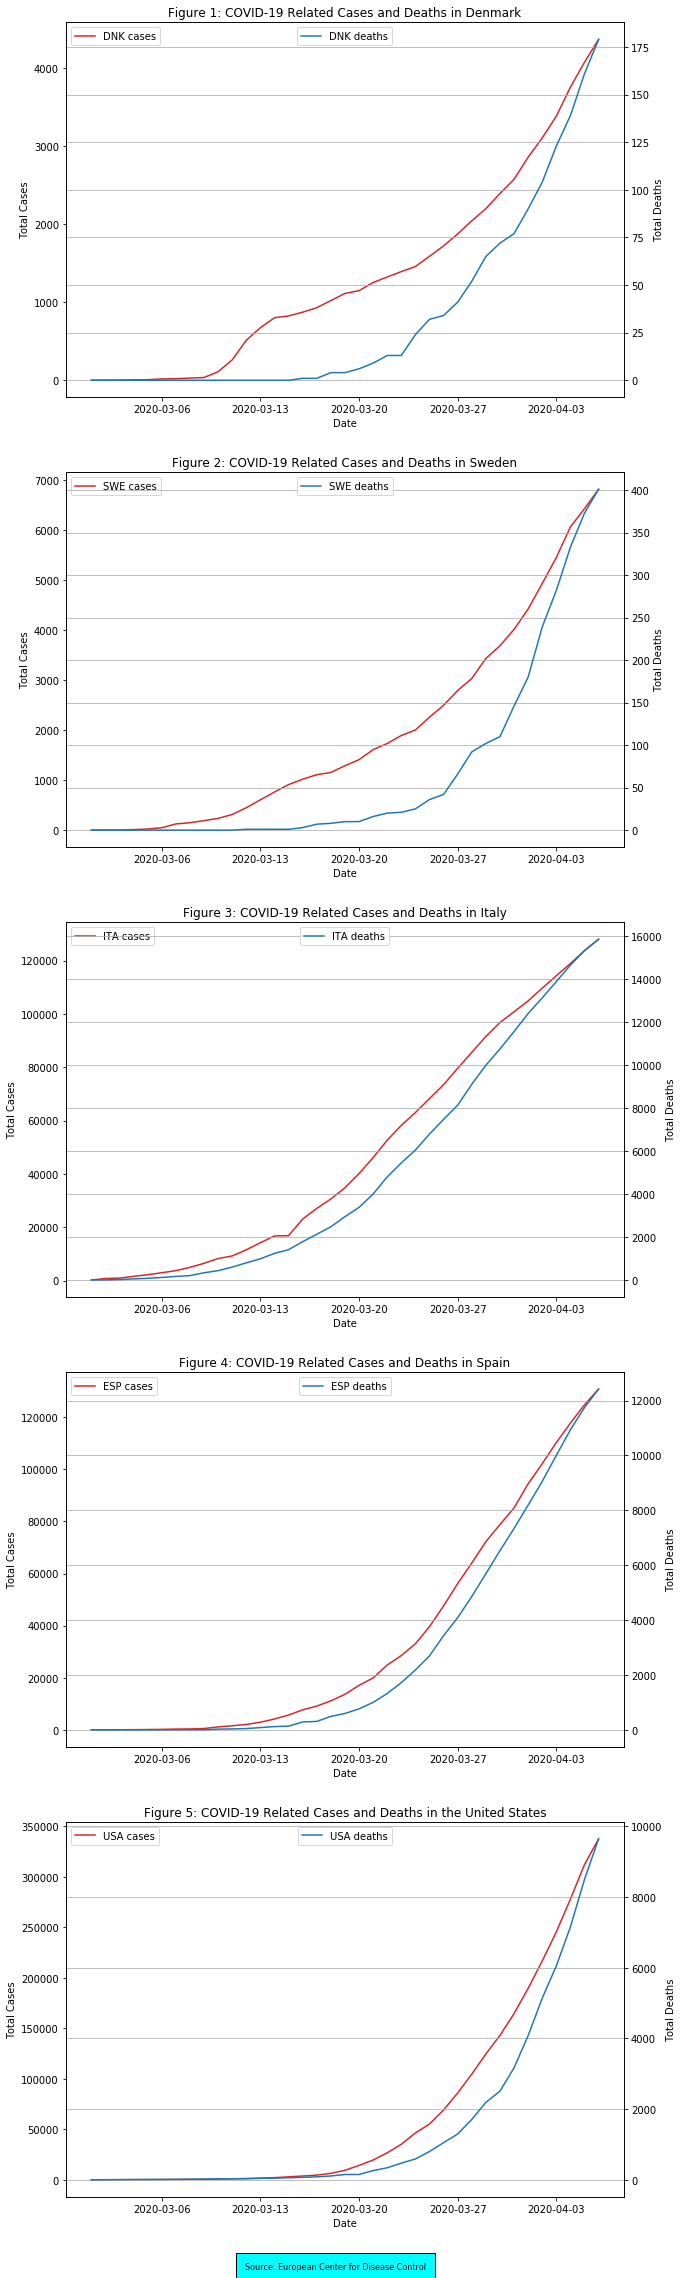

In [34]:
fig = plt.figure(figsize=(10,40))

color = 'tab:red'
ax = fig.add_subplot(5,1,1)
ax.plot(covid_accu['DNK cases'], color=color)
ax.set_ylabel('Total Cases')
ax.set_xlabel('Date')
ax.legend(loc='upper left')

ax2 = ax.twinx()

color = 'tab:blue'
ax2.set_ylabel('Total Deaths')
ax2.plot(covid_accu['DNK deaths'], color=color)
ax2.set_xlabel('Date')
ax2.grid(True)
ax2.legend(loc='upper center')
plt.title('Figure 1: COVID-19 Related Cases and Deaths in Denmark')

color = 'tab:red'
ax = fig.add_subplot(5,1,2)
ax.plot(covid_accu['SWE cases'], color=color)
ax.set_ylabel('Total Cases')
ax.set_xlabel('Date')
ax.legend(loc='upper left')

ax2 = ax.twinx()

color = 'tab:blue'
ax2.set_ylabel('Total Deaths')
ax2.plot(covid_accu['SWE deaths'], color=color)
ax2.set_xlabel('Date')
ax2.grid(True)
ax2.legend(loc='upper center')
plt.title('Figure 2: COVID-19 Related Cases and Deaths in Sweden')

color = 'tab:red'
ax = fig.add_subplot(5,1,3)
ax.plot(covid_accu['ITA cases'], color=color)
ax.set_ylabel('Total Cases')
ax.set_xlabel('Date')
ax.legend(loc='upper left')

ax2 = ax.twinx()

color = 'tab:blue'
ax2.set_ylabel('Total Deaths')
ax2.plot(covid_accu['ITA deaths'], color=color)
ax2.set_xlabel('Date')
ax2.grid(True)
ax2.legend(loc='upper center')
plt.title('Figure 3: COVID-19 Related Cases and Deaths in Italy')

color = 'tab:red'
ax = fig.add_subplot(5,1,4)
ax.plot(covid_accu['ESP cases'], color=color)
ax.set_ylabel('Total Cases')
ax.set_xlabel('Date')
ax.legend(loc='upper left')

ax2 = ax.twinx()

color = 'tab:blue'
ax2.set_ylabel('Total Deaths')
ax2.plot(covid_accu['ESP deaths'], color=color)
ax2.set_xlabel('Date')
ax2.grid(True)
ax2.legend(loc='upper center')
plt.title('Figure 4: COVID-19 Related Cases and Deaths in Spain')

color = 'tab:red'
ax = fig.add_subplot(5,1,5)
ax.plot(covid_accu['USA cases'], color=color)
ax.set_ylabel('Total Cases')
ax.set_xlabel('Date')
ax.legend(loc='upper left')

ax2 = ax.twinx()

color = 'tab:blue'
ax2.set_ylabel('Total Deaths')
ax2.plot(covid_accu['USA deaths'], color=color)
ax2.set_xlabel('Date')
ax2.grid(True)
ax2.legend(loc='upper center')
plt.title('Figure 5: COVID-19 Related Cases and Deaths in the United States')
plt.figtext(0.5, 0.1, "Source: European Center for Disease Control", ha="center", fontsize=8, bbox={"facecolor":"cyan", "alpha":1, "pad":9})

plt.show()

In order to combat the outbreak of COVID-19, the analyzed countries have adopted several approaches varying in strictness. Plotting the number recorded cases and deaths against time for the months of March and early April can help us understand the spread of COVID-19 in the selected countries. The graphical analysis is relevant, as the approaches aim to avoid exponential growth in the spread of COVID-19. In our case, exponential growth would occur when every contaminated individual infects *more* than 1 person.

The initial growth in the number of reported cases in Denmark appears to decline significantly when compared to Sweden which data exhibits closer to expotential growth. This could both be due to the strict policy with respect to social gatherings but also be related to the testing strategy, where Denmark has been criticized for lack of testing. Levels of testing in Denmark have been increasing through late March/early April, which could explain the later surge in the growth rate in Danish COVID-19 related cases. Number of reported cases following the new testing strategy as well as number of deaths could imply exponential growth rather than the desired goal of linear growth.

The numbers for Italy and Spain both imply exponential growth in both the number of reported cases as well as deaths. We note Italy experienced severe growth in the number of COVID-19 patients earlier than Spain. The numbers for late March could imply a downturn in the growth of COVID-19 related cases in Italy and a potential adjustment towards linear growth - whereas Spain shows no significant indication of a similar transition.

Although data for the United States implies the outbreak hit the country to a certain degree of severety later than the other countries in our data, the alarming growth in number of reported cases and deaths has secured the United States' position as the epicentre of the COVID-19 outbreak as measured by number of reported cases. This could be due to the lack of strict policy concerning e.g. social distancing and shutdowns as well as the signinifcant increase in testing in the country. Graphically the rate of expotential growth appears to be higher than even the hardest hit European countries.